In [11]:
# PF3D7_0303800 D464A

from collections import defaultdict

In [4]:
seq = 'MNIPKEQNKNDQINVTIEYGKDKKMKVIKTPINDTKKNNIINHNYDYSNINDKYNNTSDCYLMNNEDGINLYLNYYKKNFLKFQENNLYNVYELKDIEKKMELAILEIMNLINIQYDYAYHFLKAYNFNSNDLLENWFNNSKKVLTKLKLSHLKEEDILNNNNNNNIDEPMIKQKKEQFVHNCKQEKFICPILFLECDIEDTYTLSCGHKYSKECLKNYLKTSLHNDFEDDIITKECIDLKCNKIIKKNDWKNICEEKDYEKYLYTLLHIYIKKSKDLKKCPNKPCPYIIQSVMLNNNNVICKCGYHFCFECLHEFHRPLLCSYIKKWYELENNDDHNMKWIHAYTKMCPNCNKPIEKNSGCMNVKCICGYSFCWLCLDNWKNHKGGFYKCNKYLEHNSKYNEQKKQKKKTDKKKDDTVKTYDDEKEDTDKTHDNDNIQNNREEKRNSHLILNRYNHFKSRFNDHQYAENFSIHTQLLFLYNFCKNYNIHLHKMKFFEDAIIQIIKCRKILKWSYTYAYFSNWKSDNQKHLFEYHQGELEKNLDILQTKTEDINLTQFKNNTDNDTVRDIQQITQMIDIFFKNICEFMENNFV'

print(seq[:464])
print(seq[464:])

MNIPKEQNKNDQINVTIEYGKDKKMKVIKTPINDTKKNNIINHNYDYSNINDKYNNTSDCYLMNNEDGINLYLNYYKKNFLKFQENNLYNVYELKDIEKKMELAILEIMNLINIQYDYAYHFLKAYNFNSNDLLENWFNNSKKVLTKLKLSHLKEEDILNNNNNNNIDEPMIKQKKEQFVHNCKQEKFICPILFLECDIEDTYTLSCGHKYSKECLKNYLKTSLHNDFEDDIITKECIDLKCNKIIKKNDWKNICEEKDYEKYLYTLLHIYIKKSKDLKKCPNKPCPYIIQSVMLNNNNVICKCGYHFCFECLHEFHRPLLCSYIKKWYELENNDDHNMKWIHAYTKMCPNCNKPIEKNSGCMNVKCICGYSFCWLCLDNWKNHKGGFYKCNKYLEHNSKYNEQKKQKKKTDKKKDDTVKTYDDEKEDTDKTHDNDNIQNNREEKRNSHLILNRYNHFKSRFND
HQYAENFSIHTQLLFLYNFCKNYNIHLHKMKFFEDAIIQIIKCRKILKWSYTYAYFSNWKSDNQKHLFEYHQGELEKNLDILQTKTEDINLTQFKNNTDNDTVRDIQQITQMIDIFFKNICEFMENNFV


In [12]:
# Sample metadata

f = open('/storage/NFS/ROTATION_PROJECT/daisy/PopGen/pf6/File2_Pf_6_samples.txt', 'r')

header = f.readline().split('\t')

sample_country_dict = {}
country_samples_dict = defaultdict(list)
sample_year_dict = {}
sample_qc_pass_dict = {}

for line in f:
    items = line.strip().split('\t')
    sample, study, site, country, lat, long, year, ena, sameind, pop, pctcall, qc, _, _ = items
    year = int(year) if items[6] != 'Lab' else 'Lab'
    
    sample_country_dict[sample] = country
    country_samples_dict[country].append(sample)
    sample_year_dict[sample] = year
    sample_qc_pass_dict[sample] = True if qc == 'True' else False

In [18]:
with open('/storage/NFS/ROTATION_PROJECT/daisy/PopGen/pf6/PF3D7_0303800_D464A_Pf6.ann.txt') as f:
    samples = f.readline().strip('\n').split('\t')[9:]
    vcf_data = f.readline().strip('\n').split('\t')[9:]

country_genotypes_dict = {country: defaultdict(int) for country in country_samples_dict}

for sample, vcf_datum in zip(samples, vcf_data):
    country = sample_country_dict[sample]
    GT = vcf_datum.split(':')[0]
    country_genotypes_dict[country][GT] += 1

In [20]:
with open('/storage/NFS/ROTATION_PROJECT/daisy/PopGen/pf6/Pf6-PF3D7_1132800.ann.txt') as f:
    for line in f:
        if 'Pro130Ser' in line:
            vcf_data = line.strip('\n').split('\t')[9:]

country_genotypes_dict = {country: defaultdict(int) for country in country_samples_dict}

for sample, vcf_datum in zip(samples, vcf_data):
    country = sample_country_dict[sample]
    GT = vcf_datum.split(':')[0]
    country_genotypes_dict[country][GT] += 1

In [34]:
valid_GTs = ['0/0', '0/1', '1/1']
country_genotype_prop_dict = defaultdict(dict)

for country in country_genotypes_dict:
    total_count = sum([country_genotypes_dict[country][GT] for GT in valid_GTs])
    for GT in valid_GTs:
        country_genotype_prop_dict[country][GT] = country_genotypes_dict[country][GT]/float(total_count)

In [37]:
sorted_countries = [c for c, _ in sorted(country_genotype_prop_dict.items(), key=lambda x: x[1]['0/0'])]
sorted_countries.remove('Lab')

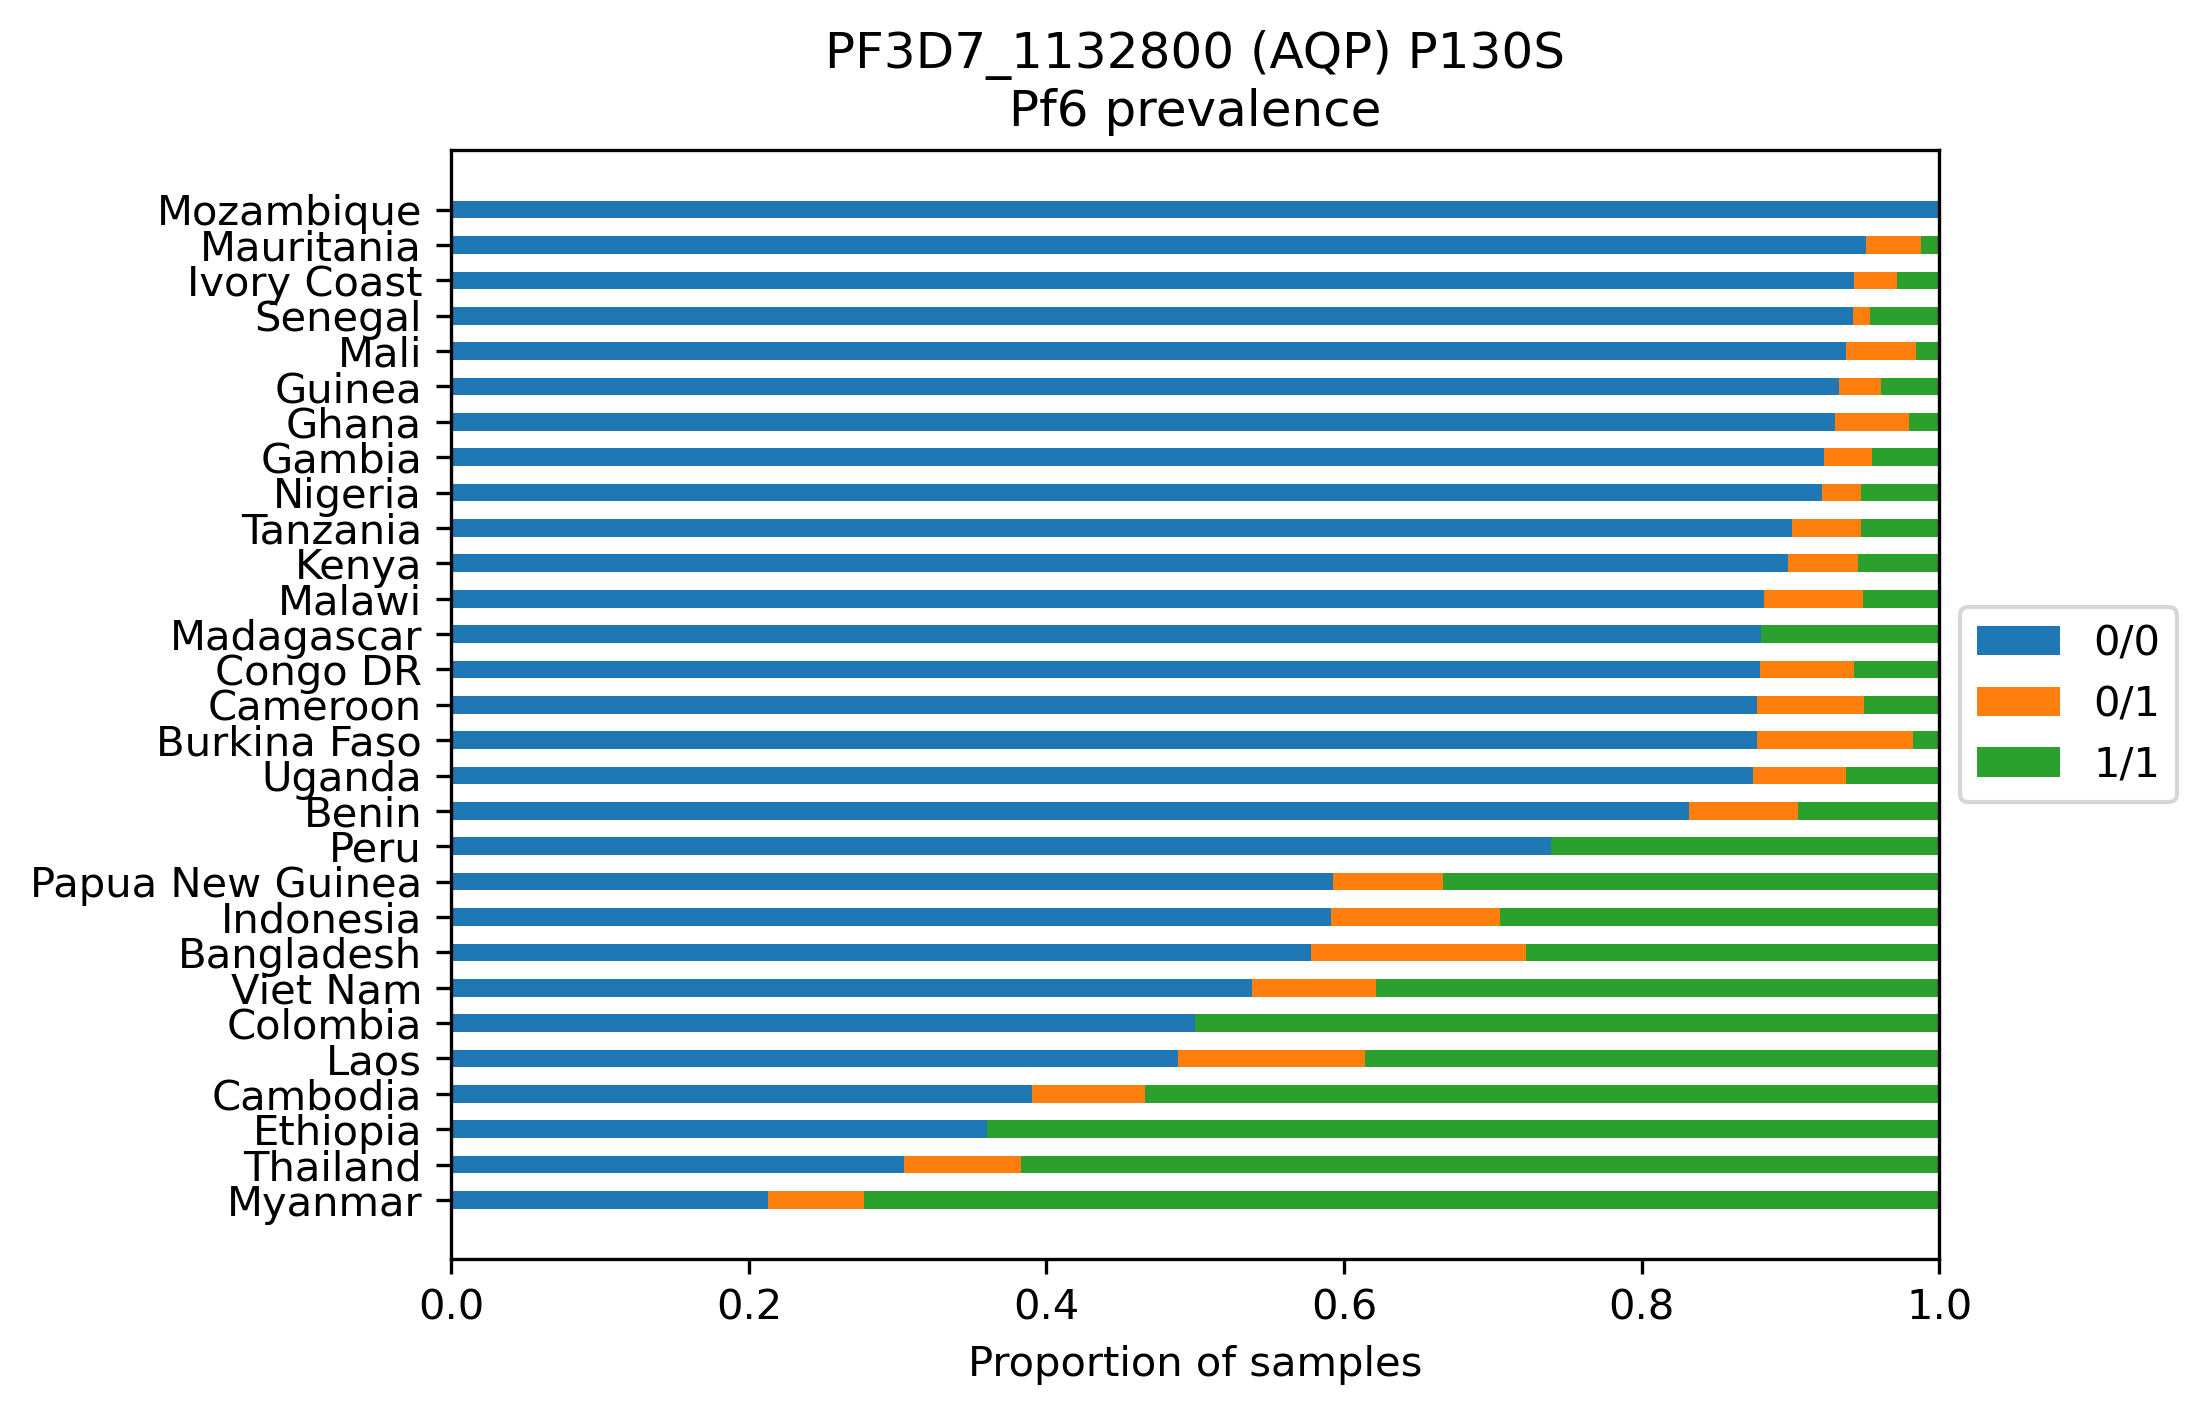

In [44]:
import matplotlib as mpl
from matplotlib import pyplot as plt
import numpy as np
mpl.rcParams['figure.dpi'] = 300

width = 0.5

fig, ax = plt.subplots()
left = np.zeros(len(sorted_countries))

for GT in ['0/0', '0/1', '1/1']:
    country_GT_counts = [country_genotype_prop_dict[c][GT] for c in sorted_countries]
    p = ax.barh(sorted_countries, country_GT_counts, width, label=GT, left=left)
    left += country_GT_counts

ax.set_title("PF3D7_1132800 (AQP) P130S\nPf6 prevalence")
ax.legend(loc="center left", bbox_to_anchor=(1, 0.5))
ax.set_xlabel("Proportion of samples")

plt.show()